In [8]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()


In [9]:
## 패션 MNIST 데이터 불러오기

from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [10]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                              padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))

In [11]:
# 두 번째 합성곱층을 삭제
# model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(50, activation='relu'))  # 은닉층 추가
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1568)              0         
                                                                 
 dense_3 (Dense)             (None, 100)               156900    
                                                                 
 dense_4 (Dense)             (None, 50)               

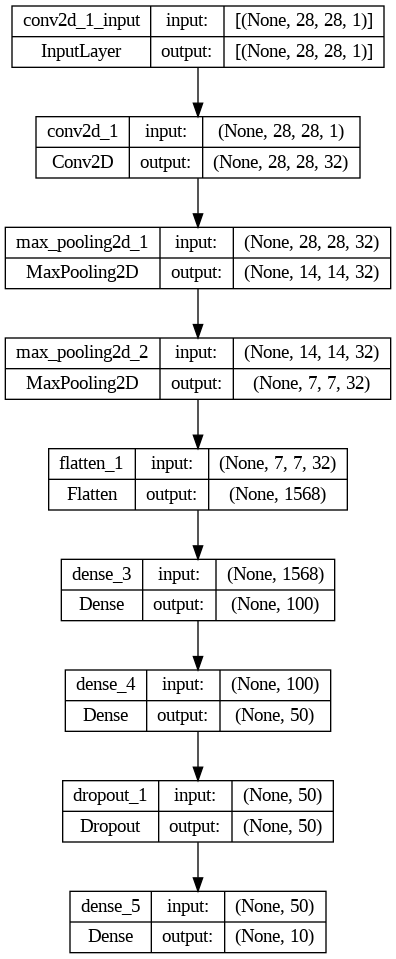

In [12]:
model.summary()

keras.utils.plot_model(model)

keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

import matplotlib.pyplot as plt

Epoch 1/20
1500/1500 [==============================] - 48s 31ms/step - loss: 0.5977 - accuracy: 0.7881 - val_loss: 0.3588 - val_accuracy: 0.8709
Epoch 2/20
1500/1500 [==============================] - 33s 22ms/step - loss: 0.3787 - accuracy: 0.8684 - val_loss: 0.3070 - val_accuracy: 0.8890
Epoch 3/20
1500/1500 [==============================] - 34s 23ms/step - loss: 0.3288 - accuracy: 0.8853 - val_loss: 0.2842 - val_accuracy: 0.8976
Epoch 4/20
1500/1500 [==============================] - 31s 21ms/step - loss: 0.3021 - accuracy: 0.8945 - val_loss: 0.2751 - val_accuracy: 0.9007
Epoch 5/20
1500/1500 [==============================] - 31s 21ms/step - loss: 0.2741 - accuracy: 0.9040 - val_loss: 0.2594 - val_accuracy: 0.9063
Epoch 6/20
1500/1500 [==============================] - 36s 24ms/step - loss: 0.2588 - accuracy: 0.9092 - val_loss: 0.2560 - val_accuracy: 0.9092
Epoch 7/20
1500/1500 [==============================] - 34s 23ms/step - loss: 0.2428 - accuracy: 0.9135 - val_loss: 0.2400 -

In [ ]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

375/375 [==============================] - 3s 9ms/step - loss: 0.2400 - accuracy: 0.9147


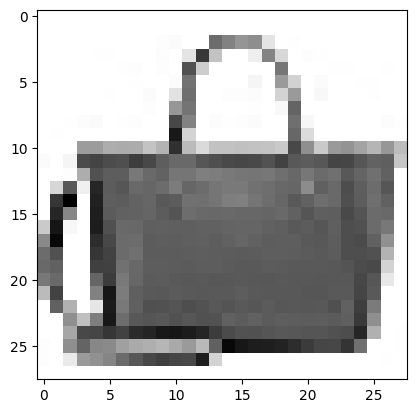

In [19]:

model.evaluate(val_scaled, val_target)

plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [20]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 33ms/step
[[1.22831675e-11 2.19261730e-21 1.19674678e-16 3.65302123e-16
  1.64887685e-17 1.39305156e-16 1.37836986e-12 1.24846608e-16
  1.00000000e+00 1.66869179e-21]]


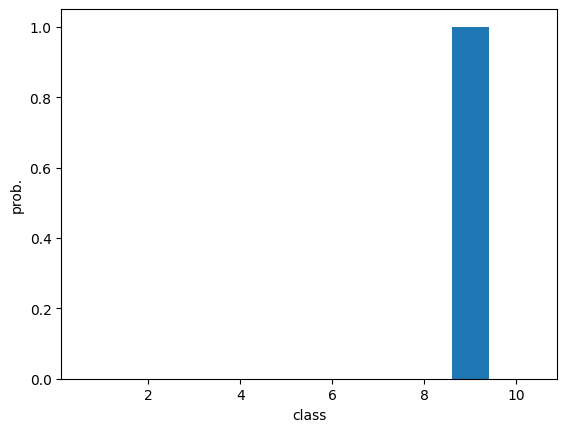

In [21]:

plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [22]:

classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

import numpy as np
print(classes[np.argmax(preds)])

test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

model.evaluate(test_scaled, test_target)

가방
313/313 [==============================] - 3s 10ms/step - loss: 0.2553 - accuracy: 0.9056


[0.2553218901157379, 0.9056000113487244]

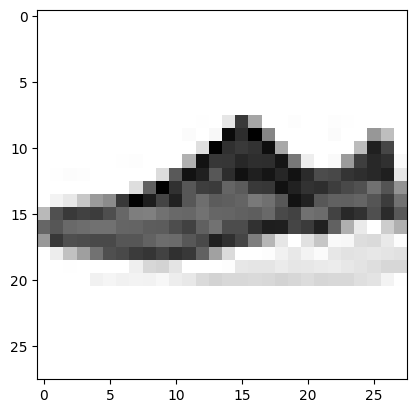

1/1 [==============================] - 0s 107ms/step
[[2.41990904e-07 2.83951096e-12 1.13454334e-07 2.54192778e-10
  1.61953118e-09 1.01482947e-04 4.25797175e-08 9.99864340e-01
  9.08101327e-08 3.37805941e-05]]


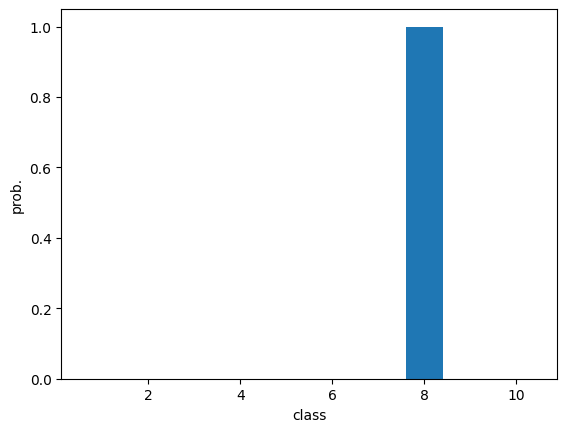

예측 클래스: 스니커즈
313/313 [==============================] - 3s 9ms/step - loss: 0.2553 - accuracy: 0.9056


[0.2553218901157379, 0.9056000113487244]

In [23]:
# '스니커즈' 이미지 찾기
sneaker_index = np.where(val_target == 7)[0][0]  # '스니커즈' 클래스는 7번
plt.imshow(val_scaled[sneaker_index].reshape(28, 28), cmap='gray_r')
plt.show()

preds = model.predict(val_scaled[sneaker_index:sneaker_index + 1])
print(preds)

plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']
print("예측 클래스:", classes[np.argmax(preds)])  # 실제 예측 결과 출력

test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0
model.evaluate(test_scaled, test_target)
